# <font color=darkblue>CE 4363/5363 Groundwater Transport Phenomena <br> Spring 2023 Exercise Set 2</font>

**LAST NAME, FIRST NAME**

**R00000000**

<hr>

### Purpose : 
Apply selected analytical models for conservative (non-reactive) transport
 
### Assessment Criteria : 
Completion, results plausible, format correct, example calculations shown.  


<hr><hr>

## Problem 1 (Problem 6-1, pg. 567)

Chloride ($Cl^{-}$) is injected as a continuous source into a 1-D column 50 centimeters long at a seepage velocity of $10^{-3}~\frac{cm}{s}$.  The effluent concentration measured at $t=1800~s$ from the start of the injection is $0.3$ of the initial concentration, and at $t=2700~s$ the effluent concentration is measured to be $0.4$ of the initial concentration.

Determine:

1. Sketch the system.
2. The longitudinal dispersivity.
3. The dispersion coefficient.


# Enter your solution below, or attach separate sheet(s) with your solution.

1. Sketch the system.

![](p1.col.png)

To find the two values below it is easiest to build a model, fit it to the observations, extract the dispersion coefficient and back-compute the dispersivity.

29.497733712430787 41.05691699451572


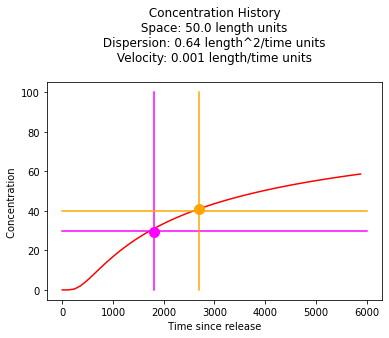

Computed concentration at time  1700  =  29.0  Target value  30.0
Computed concentration at time  2700  =  41.0  Target value  40.0


In [1]:
from math import sqrt,erf,erfc,exp  # get special math functions
#
# prototype ogatabanks function
#
def ogatabanks(c_source,space,time,dispersion,velocity):
    term1 = erfc(((space-velocity*time))/(2.0*sqrt(dispersion*time)))
    term2 = exp(velocity*space/dispersion)
    term3 = erfc(((space+velocity*time))/(2.0*sqrt(dispersion*time)))
    ogatabanks = c_source*0.5*(term1+term2*term3)
    return(ogatabanks)
#
# example inputs
#
c_source = 100.0 # source concentration
space = 50.0        # (cm) where in X-direction are we
time  = 6000.      # (s)how far in T-direction to extend the plot
dispersion = .64  # dispersion coefficient (cm^2/s)
velocity = 0.001  # pore velocity (cm/s)
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltat = time/how_many_points
t = [i*deltat for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation

t[0]=1e-5 #cannot have zero time, so use really small value first position in list
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = ogatabanks(c_source,space,t[i],dispersion,velocity)

# Special Points
cone = ogatabanks(c_source,space,1700,dispersion,velocity)
ctwo = ogatabanks(c_source,space,2700,dispersion,velocity)
print(cone,ctwo)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Space: " + repr(space) + " length units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Time since release ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.plot([0,time],[0.3*c_source,0.3*c_source],color="magenta")# target value 1
plt.plot([1800,1800],[0,c_source],color="magenta")# target value 1
plt.plot([0,time],[0.4*c_source,0.4*c_source],color="orange")# target value 2
plt.plot([2700,2700],[0,c_source],color="orange")# target value 2
plt.plot(1800,cone,color="magenta",marker=".", markersize=20)
plt.plot(2700,ctwo,color="orange",marker=".", markersize=20)
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

print("Computed concentration at time ",1700," = ",round(cone,0)," Target value ",round(0.3*c_source,0))
print("Computed concentration at time ",2700," = ",round(ctwo,0)," Target value ",round(0.4*c_source,0))

3. The dispersion coefficient.

The dispersion coefficient from the modeling exercise above is $0.64~\frac{cm^2}{sec}$

2. The longitudinal dispersivity.

Using equation 6.41 and a reported value for molecular diffusion of chloride in wasser of $2.3 \times 10^{-5} ~ \frac{cm^2}{sec}$ the dispersivity is $\alpha_l = \frac{D_l-D_d}{1 \times 10^{-3}} = \frac{0.64-2.3 \times 10^{-5}}{1 \times 10^{-3}} $



In [2]:
alpha_l = (dispersion/velocity - 2.3e-5) #cm
print("Dispersivity = ",round(alpha_l,3)," centimeters")

Dispersivity =  640.0  centimeters


## Comments 
This value of dispersivity is unrealistic.

The longitudinal dispersivity using the dispersivity plot in the book

<br> ![](dispersivity.plot.png) 

Observe that for the problem conditions we are in the lower left corner of the log-log plot where dispersivities are approximately $\frac{1}{10} ~ to ~\frac{1}{100}$ of the path length. So for this problem $\alpha_l = 0.5 ~to ~ 5 ~\text{centimeters}$

3. The dispersion coefficient.

The dispersion coefficient is the product of dispersivity and seepage velocity (Eq. 6.7 of textbook) plus the molecular diffusion coefficient ($D_d ~\approx~2 \times 10^{-9} \frac{cm^2}{sec}$). For this problem

$D_l = 0.5 \cdot 1\times~10^{-3}~\frac{cm^2}{sec} + 2 \times 10^{-9} \frac{cm^2}{sec} ~\approx~ 5.0~to~50.0 \times 10^{-4} \frac{cm^2}{sec}$

So the dispersion coefficients in this problem are unrealistic. 



<hr><hr>

## Problem 2 (Problem 6-2, pg. 567)

Chloride (𝐶𝑙−) is injected as a continuous source into a 1-D column.
The system has Darcy velocity of $5.18 \times 10^{-3}~\frac{in}{day}$, a porosity of $n=0.30$, and longitudinal dispersivity of $5 m$.

Determine:

1. Sketch the system.
2. The ratio $\frac{C}{C_0}$ at a location 0.3 meters from the injection location after 5 days of injection.
3. The ratio $\frac{C}{C_0}$ at a location 0.3 meters from the injection location after 5 days of injection, if the dispersivity is 4 times larger ($20 m$).
4. Comment on the difference in results.


In [3]:
# Enter your solution below, or attach separate sheet(s) with your solution.

### 1. Sketch the system

Convert $5.18 \times 10^{-3}~\frac{in}{day}$ into meters per day

$5.18 \times 10^{-3}~\frac{in}{day} * \frac{1~ft}{12~in} * \frac{1~m}{3.28~ft} = 1.32 \times 10^{-4} \frac{m}{day}$

Then find the pore velocity

$u = 1.32 \times 10^{-4} \frac{m}{day} \cdot \frac{1}{0.3} = 4.4 \times 10^{-4} \frac{m}{day} $

![](p2.col.png)


### 2. The ratio $\frac{C}{C_0}$ at a location 0.3 meters from the injection location after 5 days of injection.

Apply the same modeling tool.

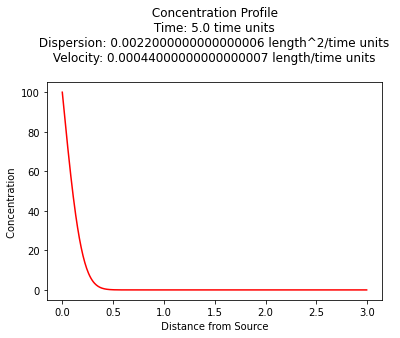

C/Co at 0.3 meters =  0.04


In [4]:
from math import sqrt,erf,erfc,exp  # get special math functions
#
# prototype ogatabanks function
#
def ogatabanks(c_source,space,time,dispersion,velocity):
    term1 = erfc(((space-velocity*time))/(2.0*sqrt(dispersion*time)))
    term2 = exp(velocity*space/dispersion)
    term3 = erfc(((space+velocity*time))/(2.0*sqrt(dispersion*time)))
    ogatabanks = c_source*0.5*(term1+term2*term3)
    return(ogatabanks)
#
# example inputs
#
c_source = 100.0 # source concentration
space = 3.      # how far in X-direction to extend the plot
time  = 5.       # time since release
velocity = (1.32E-04)/(0.30)    # pore velocity (in/day)
dispersion = (5)*velocity  # dispersion coefficient
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 500  
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = ogatabanks(c_source,x[i],time,dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

cone = ogatabanks(c_source,0.3,time,dispersion,velocity)
print("C/Co at 0.3 meters = ",round(cone/c_source,2),)

### 3. The ratio $\frac{C}{C_0}$ at a location 0.3 meters from the injection location after 5 days of injection, if the dispersivity is 4 times larger ($20 m$).

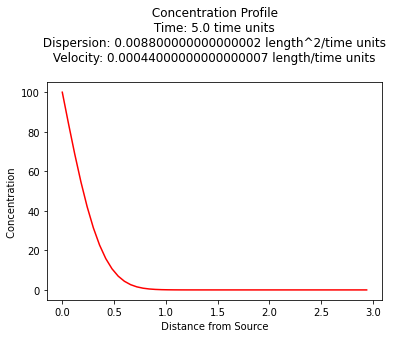

C/Co at 0.3 meters =  0.31


In [5]:
from math import sqrt,erf,erfc,exp  # get special math functions
#
# prototype ogatabanks function
#
def ogatabanks(c_source,space,time,dispersion,velocity):
    term1 = erfc(((space-velocity*time))/(2.0*sqrt(dispersion*time)))
    term2 = exp(velocity*space/dispersion)
    term3 = erfc(((space+velocity*time))/(2.0*sqrt(dispersion*time)))
    ogatabanks = c_source*0.5*(term1+term2*term3)
    return(ogatabanks)
#
# example inputs
#
c_source = 100.0 # source concentration
space = 3.      # how far in X-direction to extend the plot
time  = 5.       # time since release
velocity = (1.32E-04)/(0.30)    # pore velocity (in/day)
dispersion = 4*(5)*velocity  # dispersion coefficient
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50  
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = ogatabanks(c_source,x[i],time,dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

cone = ogatabanks(c_source,0.3,time,dispersion,velocity)
print("C/Co at 0.3 meters = ",round(cone/c_source,2),)

### 4. Comment on the difference in results.

The first condition with relatively small dispersivity exhibits about 1/7 the spread at the indicated time.  The "advective" part of the transport is at location $x_{adv} = 0.00044 \frac{m}{day} \cdot 5 \text{day} = 0.0022~meters$ hence the "front" has hardly moved.

<hr><hr> 

## Problem 3 (Problem 6-3, pg. 587)

The estimated mass from an instantaneous release of benzene is $107 \frac{kg}{m^2}$ of a 1-D aquifer system. The aquifer has a seepage velocity of $0.03 \frac{in}{day}$ and a longitudinal **dispersion coefficient** of $9 \times 10^{-4}\frac{m^2}{day}$

Determine:

1. Sketch the system.
2. Plot a concentration profile at $t = 1~\text{year}$ for $x = 0$ to $x = 50$ inches, in 1-inch increments.
2. Plot a concentration history at $x=v\times (1~\text{year})$ (this value stays constant) for $t = 0$ to $t = 2 $ years in $\frac{1}{12}$-year increments.
3. The maximum concentration at $t = 1~\text{year}$ and its location.

In [6]:
# Enter your solution below, or attach separate sheet(s) with your solution.

### 1. Sketch the system.

- Convert $0.03 \frac{in}{day}$ into $\frac{m}{day}$ <br>
$0.03 \frac{in}{day} * \frac{1~ft}{12~in} * \frac{1~m}{3.28~ft} = 0.0007622 \frac{m}{day}$

- Convert $1 in * \frac{0.0254~m}{1~in} = 0.0254~m$

![](p3.col.png)

### 2. Plot a concentration profile at $t = 1~\text{year}$ for $x = 0$ to $x = 50$ inches, in 1-inch increments.

- Convert $1~in * \frac{0.0254~m}{1~in} = 0.0254~m$

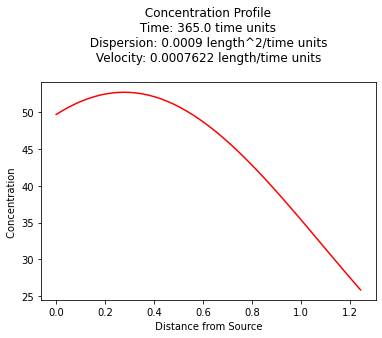

Center of Distribution Position :  0.28  length units


In [7]:
def conc(distance,time,mass,dispersion,velocity):
    import math
    term1 = math.sqrt(4.0*math.pi*dispersion*time)
    term2 = math.exp(-((distance-velocity*time)**2)/(4.0*dispersion*time))
    conc = (mass/term1)*term2
    return(conc)

thick       = 1.0
width       = 1.0
length      = 1.0
c0          = 107.0 # kg/m^3
volume      = thick*width*length
porosity    = 1.0
mass        = (c0*volume)/(porosity)
dispersion  = 9e-04 #m^2/day
velocity    = 0.0007622 #m/day
deltax      = 0.0254 #inches as meters
x = [] #inches as meters
for i in range(50):
    x.append(float(i)*deltax)
time        = 365.0 #years as days
c = [0 for i in range(50)] #concentration 
for i in range(50):
    c[i]=conc(x[i],time,mass,dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
print("Center of Distribution Position : ",round(time*velocity,2)," length units")


### 3. Plot a concentration history at $x=v\times (1~\text{year})$ (this value stays constant) for $t = 0$ to $t = 2 $ years in $\frac{1}{12}$-year increments.

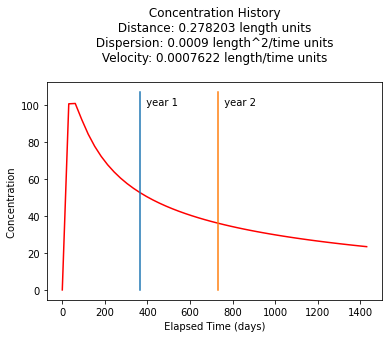

Center of Distribution Position :  0.28  length units


In [8]:
def conc(distance,time,mass,dispersion,velocity):
    import math
    term1 = math.sqrt(4.0*math.pi*dispersion*time)
    term2 = math.exp(-((distance-velocity*time)**2)/(4.0*dispersion*time))
    conc = (mass/term1)*term2
    return(conc)

thick       = 1.0
width       = 1.0
length      = 1.0
c0          = 107.0 # kg/m^3
volume      = thick*width*length
porosity    = 1.0
mass        = (c0*volume)/(porosity)
dispersion  = 9e-04 #m^2/day
velocity    = 0.0007622 #m/day
deltat      = (1/12)*365 #
howmany = 2*365/deltat 
howmany = int(howmany)
#print(howmany)

t = [] #days
for i in range(howmany*2):
    t.append(float(i)*deltat)
    if t[i] == 0: # trap zero time to prevent divide by zero
        t[i]= 0.00000001
    
distance        = 365.0*velocity #years as days

c = [0 for i in range(howmany*2)] #concentration 

for i in range(howmany*2):
    c[i]=conc(distance,t[i],mass,dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Distance: " + repr(distance) + " length units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Elapsed Time (days) ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
plt.plot([365,365],[0,c0])
plt.plot([365*2,365*2],[0,c0])
plt.text(365,100,"  year 1")
plt.text(365*2,100,"  year 2")
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
print("Center of Distribution Position : ",round(time*velocity,2)," length units")


### 4. The maximum concentration at $t = 1~\text{year}$ and its location.

In [9]:
def conc(distance,time,mass,dispersion,velocity):
    import math
    term1 = math.sqrt(4.0*math.pi*dispersion*time)
    term2 = math.exp(-((distance-velocity*time)**2)/(4.0*dispersion*time))
    conc = (mass/term1)*term2
    return(conc)

thick       = 1.0
width       = 1.0
length      = 1.0
c0          = 107.0 # kg/m^3
volume      = thick*width*length
porosity    = 1.0
mass        = (c0*volume)/(porosity)
dispersion  = 9e-04 #m^2/day
velocity    = 0.0007622 #m/day
deltax      = 0.0254 #inches as meters
x = [] #inches as meters
for i in range(365):
    x.append(float(i)*deltax)
time        = 365.0 #years as days
c = [0 for i in range(365)] #concentration 
for i in range(365):
    c[i]=conc(x[i],time,mass,dispersion,velocity)
    
#for i in range(365):
#    print(round(x[i],3),round(c[i],3))

    
xmax = velocity*time
cmax = conc(xmax,time,mass,dispersion,velocity)

print(" Maximum at time : ",round(time,3) ," days\n     at location : ", round(xmax/deltax,3)," inches\n      is :" ,round(cmax,3)," ppm ")

 Maximum at time :  365.0  days
     at location :  10.953  inches
      is : 52.664  ppm 
